In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../../Data/ml-latest-small/PreprocessedData_ml_latest_small.csv", index_col = 0)

In [3]:
df.head()

userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres  imdbId  tmdbId  
0  Adventure|Animation|Children|Comedy|Fantasy  114709   862.0  
1  Adventure|Animation|Children|Comedy|Fantasy  114709   862.0  
2  Adventure|Animation|Children|Comedy|Fantasy  114709   862.0  
3  Adventure|Animation|Children|Comedy|Fantasy  114709   862.0  
4  Adventure|Animation|Children|Comedy|Fantasy  114709   862.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
 6   imdbId     100836 non-null  int64  
 7   tmdbId     100823 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 6.9+ MB


# Cleaning

## Dropping Unnecessary Columns

In [5]:
#Drop the columns idmdId and tmdbId because we are not making any references to other datasets
df = df.drop(["imdbId", "tmdbId", "timestamp"], 1)
df.head()

/var/folders/x0/y7r22n7s1_5fk498dctvq4000000gn/T/ipykernel_23582/3161653688.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(["imdbId", "tmdbId", "timestamp"], 1)


userId  movieId  rating             title  \
0       1        1     4.0  Toy Story (1995)   
1       5        1     4.0  Toy Story (1995)   
2       7        1     4.5  Toy Story (1995)   
3      15        1     2.5  Toy Story (1995)   
4      17        1     4.5  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy

## Seperate Year from the Title

In [6]:
#Extracting the year from the title column and create a new column that contains the release "year"
df["year"] = df['title'].replace(to_replace='[^0-9]', value='', regex=True)
df.head()

userId  movieId  rating             title  \
0       1        1     4.0  Toy Story (1995)   
1       5        1     4.0  Toy Story (1995)   
2       7        1     4.5  Toy Story (1995)   
3      15        1     2.5  Toy Story (1995)   
4      17        1     4.5  Toy Story (1995)   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  
1  Adventure|Animation|Children|Comedy|Fantasy  1995  
2  Adventure|Animation|Children|Comedy|Fantasy  1995  
3  Adventure|Animation|Children|Comedy|Fantasy  1995  
4  Adventure|Animation|Children|Comedy|Fantasy  1995

In [7]:
#removing the year and paranthese from the tilte column
#df["title"] = df["title"].str.replace("(\(.*?\))", "").str.strip()
#df.head()

In [8]:
#check if the years are in range
df.year.value_counts()

1995      5512
1994      5163
1999      4298
1996      4144
2000      4054
          ... 
71964        1
172013       1
201957       1
101965       1
312016       1
Name: year, Length: 507, dtype: int64

In [9]:
#We can see, that there are some wrong dates which have more than 4 numeric numbers. 
#We need to clean that.
df["year"] = df['year'].str[-4:]
df.year.info()

<class 'pandas.core.series.Series'>
Int64Index: 100836 entries, 0 to 100835
Series name: year
Non-Null Count   Dtype 
--------------   ----- 
100836 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


In [10]:
#Converting the "year" column into a float
df["year"] = pd.to_numeric(df['year'])
df.year.head()

0    1995.0
1    1995.0
2    1995.0
3    1995.0
4    1995.0
Name: year, dtype: float64

In [11]:
df["year"].fillna(-1, inplace=True)
df.isnull().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
year       0
dtype: int64

In [12]:
df["year"] = df["year"].astype("int64")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
 3   title    100836 non-null  object 
 4   genres   100836 non-null  object 
 5   year     100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


## Mismatch: Movie ID, Title and Genres

In [14]:
# Same Movie, Different Genres/ids
def Mismatch_movieId_Title_genres(movies):
    movies_only=movies.drop(['userId','rating'],axis=1).drop_duplicates()#duplicacy due to user ids
    
    tot_movies=len(movies_only.title)
    
    titles=movies_only['title']
    show_movies_df=movies_only[titles.isin(titles[titles.duplicated()])].sort_values("title")
    if df.empty:
        print('No Mistmatch!')    
        return      
    else:
        return show_movies_df

In [15]:
check_mistmatch=Mismatch_movieId_Title_genres(df)
check_mistmatch.head()

movieId                                   title  \
88958     6003  Confessions of a Dangerous Mind (2002)   
89385   144606  Confessions of a Dangerous Mind (2002)   
33502      838                             Emma (1996)   
99604    26958                             Emma (1996)   
96980   147002                             Eros (2004)   

                                    genres  year  
88958          Comedy|Crime|Drama|Thriller  2002  
89385  Comedy|Crime|Drama|Romance|Thriller  2002  
33502                 Comedy|Drama|Romance  1996  
99604                              Romance  1996  
96980                        Drama|Romance  2004

> We have many movies with different associated genres and Ids.
>
> For example:

In [16]:
check_mistmatch[check_mistmatch['title']=='Confessions of a Dangerous Mind (2002)']

movieId                                   title  \
88958     6003  Confessions of a Dangerous Mind (2002)   
89385   144606  Confessions of a Dangerous Mind (2002)   

                                    genres  year  
88958          Comedy|Crime|Drama|Thriller  2002  
89385  Comedy|Crime|Drama|Romance|Thriller  2002

In [17]:
len(check_mistmatch)

10

We have 10 such movies.

In [18]:
movieTitles_multi=check_mistmatch['title'].tolist()
df_multi=df[df.title.isin(movieTitles_multi)]
len(df_multi)

106

and 106 associated entries in total (i.e. user ratings, etc.)

> We need to merge the information for a specific title (and year), assign only one movieId
>
> *Simply replace the movie ID with the first movieId of the same title*
>
> e.g. make both rows in the above df having a movieId 6003 for the title 'Confessions of a Dangerous Mind (2002)'

In [19]:
for movie_i in set(movieTitles_multi):
    
    firstId_i=df[df['title']==movie_i].movieId.unique()[0]
    
    df.loc[df['title']==movie_i,['movieId']]=firstId_i
    
    

> Now, check again

In [20]:
check_mistmatch=Mismatch_movieId_Title_genres(df)
check_mistmatch.head(20)

movieId                                   title  \
88958      6003  Confessions of a Dangerous Mind (2002)   
89385      6003  Confessions of a Dangerous Mind (2002)   
33502       838                             Emma (1996)   
99604       838                             Emma (1996)   
96980    147002                             Eros (2004)   
100641   147002                             Eros (2004)   
18651      2851                         Saturn 3 (1980)   
99664      2851                         Saturn 3 (1980)   
39409     34048                War of the Worlds (2005)   
73911     34048                War of the Worlds (2005)   

                                     genres  year  
88958           Comedy|Crime|Drama|Thriller  2002  
89385   Comedy|Crime|Drama|Romance|Thriller  2002  
33502                  Comedy|Drama|Romance  1996  
99604                               Romance  1996  
96980                         Drama|Romance  2004  
100641                                Drama  2004  
18651             Adventure|Sci-Fi|Thriller  1980  
99664                       Sci-Fi|Thriller  1980  
39409      Action|Adventure|Sci-Fi|Thriller  2005  
73911                         Action|Sci-Fi  2005

> Now, the movie ID issue is solved. But the genres listed are still different.

In [21]:
movieTitles_multi=check_mistmatch['title'].tolist()

for movie_i in set(movieTitles_multi):
    
    genres_i=df[df['title']==movie_i].genres.unique()
    
    genre_i=''
    for i in genres_i:
        genre_i=genre_i+'|'+i
    
    #Description of individual steps:
    #.split("|") #creates extra '' at beginning
    #so we take after the first element[1:]
    #set()#take unique values
    
    genre_words=list(set(genre_i.split("|")[1:]))
    
    #print(movie_i, genre_words)
    #Now again add them
    g_final=''
    for i in genre_words:
        g_final +="|"+i
        
    #print(movie_i, g_final)
    df.loc[df['title']==movie_i,['genres']]=g_final
    
#Finally, a second drop duplicates
df=df.drop_duplicates()

In [22]:
Mismatch_movieId_Title_genres(df)

Empty DataFrame
Columns: [movieId, title, genres, year]
Index: []

> Hurreh! No more duplicates!

# Building Graphs

We are going for the collaborative filtering. No target variable. Only needs a rating of the users. No need to keep the tags. 

In [23]:
#Exporting the cleaned dataset
df.to_csv("../../Data/ml-latest-small/PreprocessedData_ml_latest_year_small.csv",index=False)

In [24]:
test_gre = pd.cut(x = df['year'],
                  bins = [1920, 1960, 1980, 1990, 2000, 2010, 2020], labels = ["before 1960", '1961 - 1980','1981 - 1990', '1991 - 2000', '2001 - 2010', "2011 - 2020"])
test_gre.head()

0    1991 - 2000
1    1991 - 2000
2    1991 - 2000
3    1991 - 2000
4    1991 - 2000
Name: year, dtype: category
Categories (6, object): ['before 1960' < '1961 - 1980' < '1981 - 1990' < '1991 - 2000' < '2001 - 2010' < '2011 - 2020']

/var/folders/x0/y7r22n7s1_5fk498dctvq4000000gn/T/ipykernel_23582/3238663987.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(b.get_xticklabels(), rotation=45, ha="right")


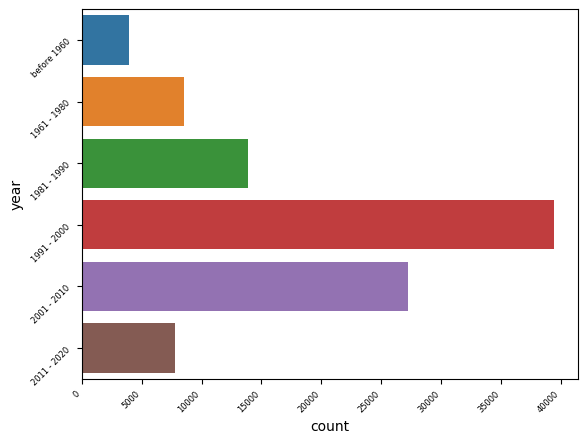

In [25]:
b=sns.countplot(y = test_gre)
b.set_xticklabels(b.get_xticklabels(), rotation=45, ha="right")
b.set_yticklabels(b.get_yticklabels(), rotation=45, ha="right")
b.tick_params(labelsize=6)
plt.show()

/var/folders/x0/y7r22n7s1_5fk498dctvq4000000gn/T/ipykernel_23582/3083002000.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(b.get_xticklabels(), rotation=45, ha="right")


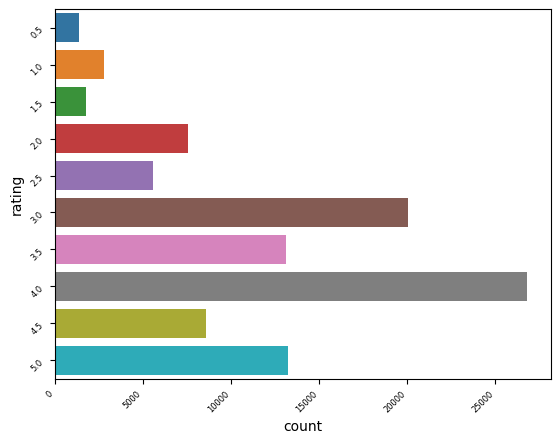

In [26]:
b=sns.countplot(y = df.rating)
b.set_xticklabels(b.get_xticklabels(), rotation=45, ha="right")
b.set_yticklabels(b.get_yticklabels(), rotation=45, ha="right")
b.tick_params(labelsize=6)
plt.show()

In [27]:
df.rating.value_counts()

4.0    26817
3.0    20047
5.0    13211
3.5    13134
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64